# Аналитика продаж для интернет-магазина компьютерных игр


### Описание данных
+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).  

### Значение рейтингов
+ ЕС — для детей младшего возраста
+ Е — для всех
+ Е10+ — для всех от 10 лет и старше
+ Т — для подростков
+ М — для взрослых
+ АО — только для взрослых 18+
+ RP — рейтинг ожидается  

# Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
from datetime import datetime
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
import os

pth1 = '/datasets/games.csv'
pth2 = '/Users/anna/Downloads/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv('/datasets/games.csv')
elif os.path.exists(pth2):
    df = pd.read_csv('/Users/anna/Downloads/games.csv')
else:
    print('Something is wrong')

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3790,Front Mission 2,PS,1997.0,Strategy,0.0,0.00,0.49,0.03,NaN,NaN,NaN
9577,Spartan: Total Warrior,XB,2005.0,Action,0.1,0.03,0.00,0.00,73.0,8.8,M
12632,Magi: Aratanaru Sekai,3DS,2014.0,Role-Playing,0.0,0.00,0.06,0.00,NaN,NaN,NaN
11538,Sentimental Graffiti 2,DC,2000.0,Adventure,0.0,0.00,0.08,0.00,NaN,NaN,NaN
5266,Momotarou Dentetsu 12,PS2,2003.0,Misc,0.0,0.00,0.35,0.00,NaN,NaN,NaN


In [4]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Первый вывод:** в датасете более 16 тысяч строк, в некоторых столбцах (Critic_Score, User_Score, Rating) есть пропуски.

# Шаг 2. Подготовим данные
## 2.1 Изменим названия столбцов

In [5]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## 2.2 Преобразуем данные в нужные типы
Опишем, в каких столбцах заменили тип данных и почему.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим тип данных в следующих столбцах:  

+ year_of_release — здесь должен быть тип данных int
+ user_score — это числовой тип данных

In [47]:
df['year_of_release'] = df['year_of_release'].fillna(2036) #заменила пропуски на 2036.
#Просто потому нужно же было их чем-то заменить
df['year_of_release'] = df['year_of_release'].astype('int')

Попробовали заменить тип в user_score - не получилось. Посмотрим, что за значения в этом столбце.

In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим nan и tbd. tbd означает «подлежит уточнению», а значит можно тоже считать это пропуском. Заменим tbd на пропуски и поменяем тип данных:

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Вывод:** мы привели данные к нужным типам.

## 2.3 Обработаем пропуски (при необходимости)
+ Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
+ Опишем причины, которые могли привести к пропускам;
+ Отдельно разберем аббревиатуру 'tbd' в столбце с оценкой пользователей и опишем, как его обработать;

Сначала посмотрим на пропуски в данных.

In [10]:
df.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     0.000000
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Есть пропуски в name и genre. Удалим их:

In [11]:
df = df.dropna(subset=['genre', 'name'])
df.isna().mean()*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
dtype: float64

У нас довольно большие пропуски в critic_score и user_score (больше половины), а также 40% пропусков в rating.  

Причины пропусков в рейтинге нам неизвестны; если заменять медианой или средним, получим искажение. Поэтому поставим «заглушки».

In [12]:
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['rating'] = df['rating'].fillna('неизвестно')

/var/folders/9c/717fbzy1057_6lkjlqtl3ygr0000gn/T/ipykernel_12435/4266767494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].fillna(-1)
/var/folders/9c/717fbzy1057_6lkjlqtl3ygr0000gn/T/ipykernel_12435/4266767494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['critic_score'] = df['critic_score'].fillna(-1)
/var/folders/9c/717fbzy1057_6lkjlqtl3ygr0000gn/T/ipykernel_12435/4266767494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Что касаемо значений tbd, их мы уже заменили на пропуски. Т.к. tbd означает «будет уточнено» или «будет добавлено». А значит этих значений на данный момент у нас нет.

**Вывод**:  

Мы заменили пропуски в столбцах с рейтингом и оценкой. Причины возникновения таких пропусков неизвестны. Заменили пропуски на заглушки «-1», кроме столбца year_of_release — там пропуски заменили заглушкой «2036». Пропуски нельзя было заменить медианой или средним рейтингом, т.к это исказило бы данные. 

## 2.4 Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [48]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36


**Вывод:** мы подготовили данные к исследованию. А именно:
+ привели названия столбцов к нижнему регистру
+ преобразовали данные в нужные типы
+ заменили пропуски на заглушки, т.к. это единственный вариант замены без искажения данных. Причины пропусков нам неизвестны. Единственное — можно сделать предположение, что в Японии своя система оценки игр CERO, которая отличается от ESRB. Кроме того, другая система оценки игр и в Европе (PEGI). Поэтому могут возникать пропуски.
+ Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

# Шаг 3. Проведем исследовательский анализ данных.
## 3.1 Посмотрим, сколько игр выпускалось за разные годы
И ответим на вопрос — важны ли данные за все периоды?

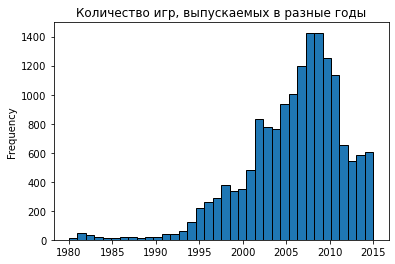

In [14]:
df['year_of_release'].plot(kind='hist', bins=36, range=(1980, 2015), ec='black')
plt.title('Количество игр, выпускаемых в разные годы');

**Вывод:** Больше всего игр выпускалось в **2009** и **2010** годах. Можем предположить, что можно отбросить данные с играми, выпущенными ранее 1995 года, т.к. именно с 1995 начался рост в гейм-индустрии. Может быть, это из-за того что вышла Windows 95 и у разработчиков стало больше возможностей. А в 2012 по 2015 был спад.

## 3.2 Посмотрим, как менялись продажи по платформам.
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос — за какой характерный срок появляются новые и исчезают старые платформы?

Чтобы посмотреть на платформы с наибольшими суммарными продажами, построим сводную таблицу.

In [15]:
df_pltfrm = df.pivot_table(index='platform',
values=['total_sales', 'year_of_release'],
aggfunc={'total_sales':sum, 'year_of_release':min}).sort_values(by='total_sales', ascending=False).reset_index()

df_pltfrm.head(10)

,platform,total_sales,year_of_release
0,PS2,1255.77,2000
1,X360,971.42,2005
2,PS3,939.65,2006
3,Wii,907.51,2006
4,DS,806.12,1985
5,PS,730.86,1994
6,GBA,317.85,2000
7,PS4,314.14,2013
8,PSP,294.05,2004
9,PC,259.52,1985


Видим, что первые 6 платформ имеют больше всего продаж. По ним и будем строить распределение по годам.

In [16]:
df_pltfrm_top = df_pltfrm.head(10)
top10 = df_pltfrm_top['platform'].unique()
top10

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'],
      dtype=object)

In [17]:
top_pltfrm = df.query('platform in @top10')
best_sales = top_pltfrm.pivot_table(index=['platform', 'year_of_release'],
values='total_sales', aggfunc='sum').reset_index()
best_sales.head(10)


,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
5,DS,2008,145.31
6,DS,2009,119.54
7,DS,2010,85.02
8,DS,2011,26.18
9,DS,2012,11.01


In [18]:
def sell_line(data):
    sns.color_palette('husl', 15)
    sns.set_theme()
    plt.figure(figsize=(18,8))
    plt.xlabel('Год продажи')
    plt.ylabel('Количество продаж в год')
    plt.title('Статистика продаж игр на разных платформах по годам')
    sns.lineplot(data=data, x='year_of_release', y='total_sales', hue='platform', linewidth=5, marker = 'o')

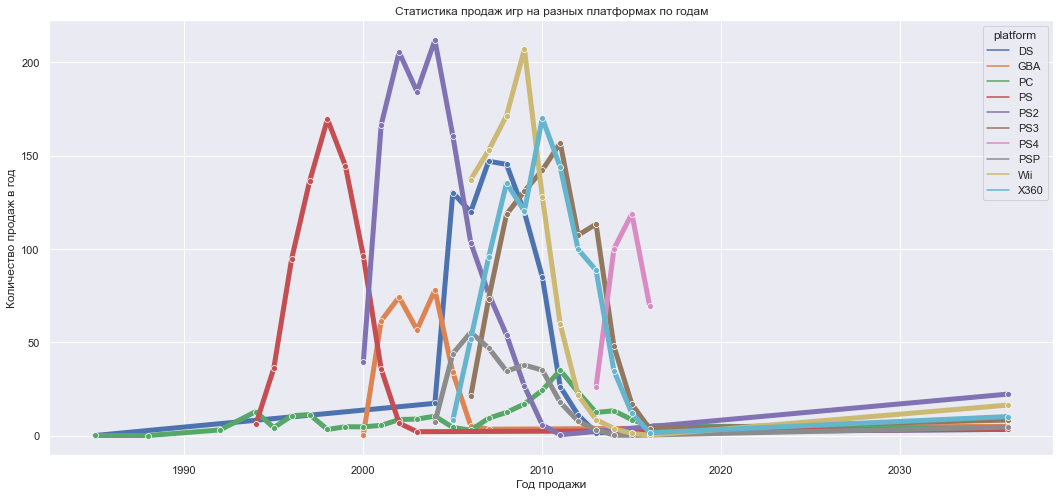

In [19]:
sell_line(best_sales)

Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы:
+ DS – появилась в 1985, с 2003 данные нормально начинают отслеживать, пик — в 2008, исчезла примерно в 2013. Срок жизни будем сичтать 10 лет.
+ PS – появилась в 1994, пик — в 1998, исчезла примерно в 2003. Срок жизни — 9 лет.
+ PS2 — появилась в 2000, пик — в 2003, исчезла примерно в 2011. Срок жизни — 11 лет.
+ PS3 — появилась в 2006, пик — в 2011, в 2013 пошла на спад. (возможно, вышла PS4)
+ Wii — появилась в 2006, пик — в 2009, но в 2016 уже почти изжила себя.
+ X360 — появилась в 2005, пик — в 2020, в 2013 пошла на спад.
+ GBA  – появилась в 2000, исчезла в 2006.
+ PS – появилась в 1994, к 2003 изжила себя.
+ PS3 — вышла в 2013 и до сих пор есть продажи.
+ PC – вышла в 1985, продажи к 2016 почти нет.

**Вывод**: в среднем платформа живет 10 лет.

## 3.3 Узнаем, какие платформы лидируют по продажам, растут или падают.
Выберем несколько потенциально прибыльных платформ.Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитываем в работе данные за предыдущие годы.


**Какой период будем считать актуальным?** Возьмем данные с 2013 года, т.к. в этом году вышли PS4 и Xbox One, на которые до сих пор выходят игры.  

Соответственно, сделаем срез (2036 — это заглушка):

In [46]:
df = df.query('year_of_release>=2013 and year_of_release!=2036')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36


Сделаем сводную таблицу, как в предыдущем пункте.

In [21]:
act_platform = df.pivot_table(index=['platform', 'year_of_release'],
values='total_sales', aggfunc='sum').reset_index()
act_platform.head()

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54


По этой сводной таблице построим график.

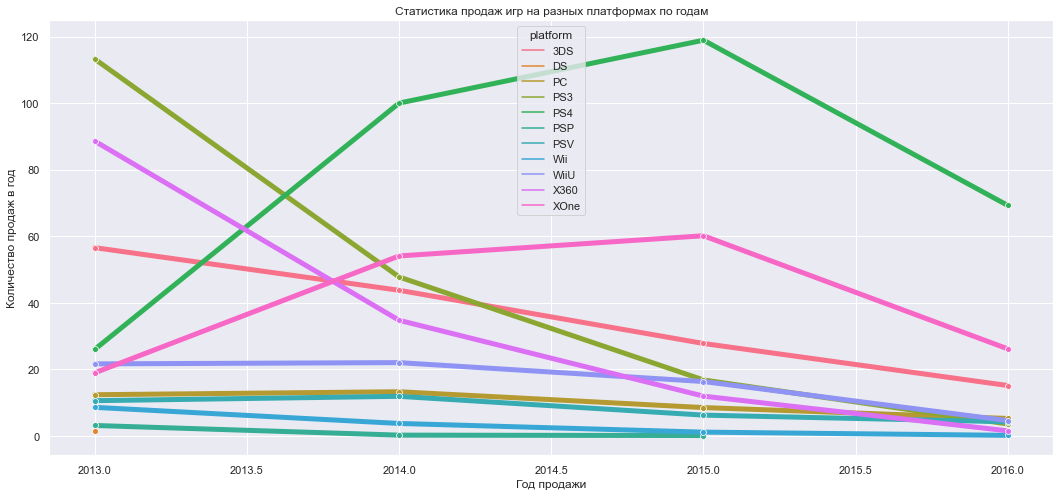

In [22]:
sns.color_palette('husl', 15)
sns.set_theme()
plt.figure(figsize=(18,8))
plt.xlabel('Год продажи')
plt.ylabel('Количество продаж в год')
plt.title('Статистика продаж игр на разных платформах по годам')
sns.lineplot(data=act_platform, x='year_of_release', y='total_sales', hue='platform', linewidth=5, marker = 'o');

**Какие выводы можем сделать:**
+ В период с 2013 по 2015 росли продажи только у двух платформ: PS4 и XOne. У всех остальных платформ они падали. Мы не будем смотреть на 2016 год, т.к. данные неполные, и возможно искажение.
+ Соответственно, самые перспективные на 2017 год платформы — это **PS4 и XOne**.

## 3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
Опишем результат.

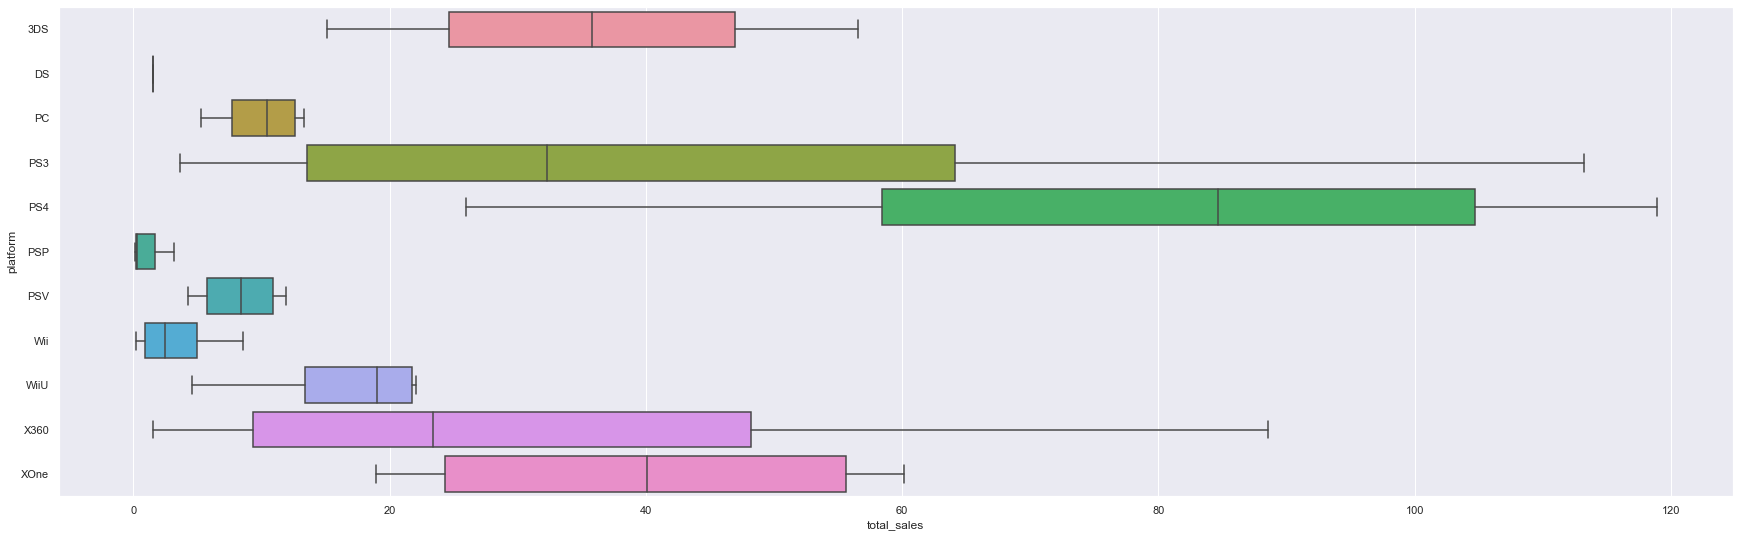

In [23]:
plt.figure(figsize=(30,9))
sns.boxplot(y="platform", x="total_sales", data=act_platform, orient="h");

**Выводы:**
+ Больше всего продаж — у PS4 и PS3 (119 и 111 млн. проданных копий соответственно). На третьем месте Xbox 360 — около 88 млн. проданных копий.
+ Меньше всего продаж — у платформы DS, около 3 млн. проданных копий.

## 3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Начнем с PS4 — у нее больше всего продаж. Посторим диаграмму рассеяния.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

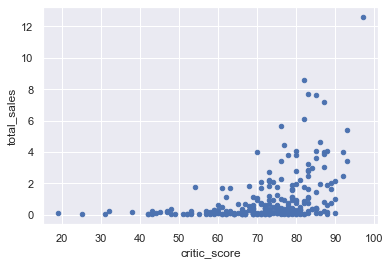

In [24]:
df.query('platform=="PS4" and critic_score>0').plot(x='critic_score', y='total_sales', kind='scatter') 

Теперь посчитаем корреляцию.

In [25]:
print(df.query('platform=="PS4" and critic_score>0')['critic_score'].corr(df.query('platform=="PS4" and critic_score>0')['total_sales']))

0.40656790206178095


**Вывод:** Между оценками критиков и продажами  PS4 есть умеренная корреляция (корреляция равна 0,4). Чем выше оценка критиков, тем больше продажи.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

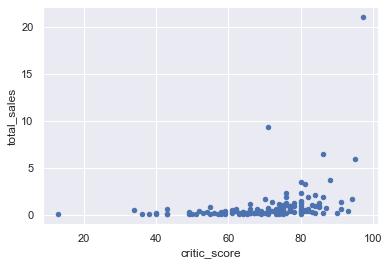

In [26]:
df.query('platform=="PS3" and critic_score>0').plot(x='critic_score', y='total_sales', kind='scatter') 

In [27]:
print(df.query('platform=="PS3" and critic_score>0')['critic_score'].corr(df.query('platform=="PS3" and critic_score>0')['total_sales']))

0.3342853393371919


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

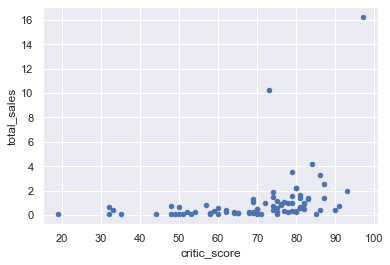

In [28]:
df.query('platform=="X360" and critic_score>0').plot(x='critic_score', y='total_sales', kind='scatter') 

In [29]:
print(df.query('platform=="X360" and critic_score>0')['critic_score'].corr(df.query('platform=="X360" and critic_score>0')['total_sales']))

0.3503445460228664


### Сравним корреляцию между оценкой критиков и продажами игр у трех самых популярных платформ:
+ PS4 — 0.4
+ PS3 — 0.33
+ Xbox One —0.35.  

**Это означает, что между оценками критиков и продажами игр есть умеренная корреляция**

>|**Вывод:** Между оценками критиков и продажами игр есть умеренная корреляция (корреляция не больше 0,4). 
Так что оценки критиков имеют влияние на продажи, но не сильное.

## 3.6 Посмотрим на общее распределение игр по жанрам.
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? Посмотрим на графике.

(0.0, 4.0)

<Figure size 720x360 with 0 Axes>

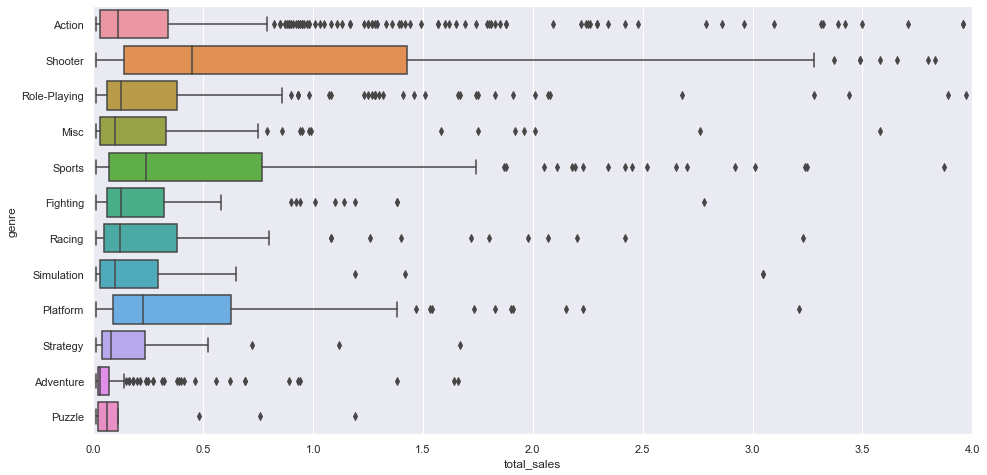

In [30]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(10,5))
plt.figure(figsize=(cm_to_inch(40),cm_to_inch(20)))
sns.boxplot(y="genre", x="total_sales", data=df, orient="h");
plt.xlim(0, 4) 

**Вывод:** самые прибыльные жанры — это shooter и sports. Самые низкие продажи — у жанров adventure и puzzle. 

### Выводы по шагу 3
Мы провели исследовательский анализ данных и узнали:
+ Больше всего игр выпускалось в 2009 и 2010 годах. Могу предположить, что можно отбросить данные с играми, выпущенными ранее 1995 года, т.к. именно с 1995 начался рост в гейм-индустрии. Может быть, это из-за того что вышла Windows 95 и у разработчиков стало больше возможностей. А в 2012 по 2015 был спад.
+ В среднем игровая платформа «живет» 10 лет, пока не появятся более новые модели.
+ В период с 2013 по 2015 росли продажи только у двух платформ: PS4 и XOne. У всех остальных платформ они падали. Мы не будем смотреть на 2016 год, т.к. данные неполные, и возможно искажение.Соответственно, самые перспективные на 2017 год платформы — это PS4 и XOne.
+ Больше всего продаж в актуальном периоде (с 2013 по 2016) — у PS4 и PS3 (119 и 111 млн. проданных копий соответственно). На третьем месте Xbox 360 — около 88 млн. проданных копий. Меньше всего продаж — у платформы DS, около 3 млн. проданных копий.
+ Между оценками критиков и продажами игр есть умеренная корреляция. Так что оценки критиков имеют влияние на продажи, но не сильное.
+ Самые прибыльные жанры — это shooter и sports. Самые низкие продажи — у жанров adventure и puzzle.

# Шаг 4. Составим портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):
+ Самые популярные платформы (топ-5). Опишем различия в долях продаж.
+ Самые популярные жанры (топ-5). Поясним разницу.
+ Влияет ли рейтинг ESRB на продажи в отдельном регионе?

>Начнем с Северной Америки.

In [31]:
# самая популярная платофрма
na_top = df.pivot_table(index=['platform'],
values='na_sales', aggfunc='sum').reset_index()
na_top.sort_values(by='na_sales', ascending=False).head(5)

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


In [32]:
#самый популярный жанр
na_genre = df.pivot_table(index=['genre'],
values='na_sales', aggfunc='sum').reset_index()
na_genre.sort_values(by='na_sales', ascending=False).head(5)

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [33]:
#влияет ли рейтинг на продажи
na_score = df.pivot_table(index=['rating'],
values='na_sales', aggfunc='sum').reset_index()
na_score.sort_values(by='na_sales', ascending=False).head()

,rating,na_sales
2,M,165.21
4,неизвестно,89.42
0,E,79.05
1,E10+,54.24
3,T,49.79


**Портрет пользователя Северной Америки:**
+ Самые популярные платформы — PS4,XOne,X360. Разница между ними не очень большая — 10-15 млн. проданных копий.
+ Самые популярные жанры — Action, Shooter, Sports. Причем продажи игр в жанре «спорт» почти в два раза меньше, чем продажи игр в жанре «шутер».
+ Рейтинг влияет на продажи игр: если у игры рейтинг М (Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.), то больше вероятность, что ее купят. Почти в два раза менььше продается игр с рейтингом Е (Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.) Меньше всего продается игр с рейтингом Т (Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.) Могу предположить, что подростки играют либо в игры с рейтингом М, либо в игры с рейтингом Е.

>Теперь составим портрет европейского пользователя.

In [34]:
# самая популярная платофрма
eu_top = df.pivot_table(index=['platform'],
values='eu_sales', aggfunc='sum').reset_index()
eu_top.sort_values(by='eu_sales', ascending=False).head(5)

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


In [35]:
#самый популярный жанр
eu_genre = df.pivot_table(index=['genre'],
values='eu_sales', aggfunc='sum').reset_index()
eu_genre.sort_values(by='eu_sales', ascending=False).head(5)

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [36]:
#влияет ли рейтинг на продажи
eu_score = df.pivot_table(index=['rating'],
values='eu_sales', aggfunc='sum').reset_index()
eu_score.sort_values(by='eu_sales', ascending=False).head()

,rating,eu_sales
2,M,145.32
0,E,83.36
4,неизвестно,78.91
1,E10+,42.69
3,T,41.95


**Портрет пользователя из Европы:**
+ Самые популярные платформы — PS4 и PS3, при этом PS4 продано почти в два раза больше.
+ Самые популярные жанры —  Action, Shooter, Sports. Так же, как и в Северной Америке.
+ Больше всего продается игр с рейтингом М. Следом за ними — игры с рейтингом Е. Игры для тинейджеров (рейтинг Т) имеют самые низкие продажи.

>Теперь составим портрет пользователя из Японии.

In [37]:
# самая популярная платофрма
jp_top = df.pivot_table(index=['platform'],
values='jp_sales', aggfunc='sum').reset_index()
jp_top.sort_values(by='jp_sales', ascending=False).head(5)

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


In [38]:
#самый популярный жанр
jp_genre = df.pivot_table(index=['genre'],
values='jp_sales', aggfunc='sum').reset_index()
jp_genre.sort_values(by='jp_sales', ascending=False).head(5)

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


In [39]:
#влияет ли рейтинг на продажи
jp_score = df.pivot_table(index=['rating'],
values='jp_sales', aggfunc='sum').reset_index()
jp_score.sort_values(by='jp_sales', ascending=False).head()

,rating,jp_sales
4,неизвестно,85.05
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


**Портрет пользователя из Японии:**
+ самые популярные платформы — 3DS, PS3 и PSV. При этом у платформы 3DS почти в три раза больше продаж, чем у PS3. В Японии любят Нинтендо.
+ самые популярные жанры Role-Playing, Action и Misc(аркады). При этом между экшеном и аркадами огромный разрыв — почти в 4,5 раза меньше продаж. Шутеры в Японии на удивление непопулярны.
+ А вот с рейтингом сложно что-то сказать. Т.к. у 85 млн. копий игр рейтинг не определен. Это связяно с тем, что в Японии своя рейтинговая система. Далее по популярности — игры для подростков (рейтинг Т) и для всех (рейтинг Е).

## Выводы для шага 4. 
Мы составили портрет пользователя каждого региона:
### Портрет пользователя Северной Америки:

+ Самые популярные платформы — PS4,XOne,X360. Разница между ними не очень большая — 10-15 млн. проданных копий.
+ Самые популярные жанры — Action, Shooter, Sports. Причем продажи игр в жанре «спорт» почти в два раза меньше, чем продажи игр в жанре «шутер».
+ Рейтинг влияет на продажи игр: если у игры рейтинг М (Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.), то больше вероятность, что ее купят. Почти в два раза менььше продается игр с рейтингом Е (Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.) Меньше всего продается игр с рейтингом Т (Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.) Могу предположить, что подростки играют либо в игры с рейтингом М, либо в игры с рейтингом Е.

### Портрет пользователя из Европы:
+ Самые популярные платформы — PS4 и PS3, при этом PS4 продано почти в два раза больше.
+ Самые популярные жанры — Action, Shooter, Sports. Так же, как и в Северной Америке.
+ Больше всего продается игр с рейтингом М. Следом за ними — игры с рейтингом Е. Игры для тинейджеров (рейтинг Т) имеют самые низкие продажи.

### Портрет пользователя из Японии:
+ самые популярные платформы — 3DS, PS3 и PSV. При этом у платформы 3DS почти в три раза больше продаж, чем у PS3. В Японии любят Нинтендо.
+ самые популярные жанры Role-Playing, Action и Misc(аркады). При этом между экшеном и аркадами огромный разрыв — почти в 4,5 раза меньше продаж. Шутеры в Японии на удивление непопулярны.
+ А вот с рейтингом сложно что-то сказать. Т.к. у 85 млн. копий игр рейтинг не определен. Это связяно с тем, что в Японии своя рейтинговая система. Далее по популярности — игры для подростков (рейтинг Т) и для всех (рейтинг Е).

# Шаг 5. Проверяем гипотезы.
+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
+ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

alpha = 0.05.  

In [40]:
df = df.query('user_score>0')

Первая нулевая гипотеза: **«Средние пользовательские рейтинги платформ Xbox One и PC равны».**  

Альтернативная гипотеза: **«Средние пользовательские рейтинги платформ Xbox One и PC НЕ равны».**
  
Гипотезы делаем двусторонними, потому что отклонение может быть и в большую, и в меньшую сторону.

Используем t-тест, т.к. выборки не зависят друг от друга.

Дисперсии отличаются, но мы укажем что equal_var = False и все.

In [41]:
df=df.query('user_score!= -1')

In [42]:
sample_1 = df[df['platform'] == 'XOne']['user_score']
sample_2 = df[df['platform'] == 'PC']['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

equal_var = False

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вторая нулевая гипотеза: **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.**

Вторая альтернативная гипотеза: **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») НЕ равны.**

In [44]:
sample_1 = df[df['genre'] == 'Action']['user_score']
sample_2 = df[df['genre'] == 'Sports']['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

equal_var = False

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


## Вывод:
Мы составили нулевые и альтернативные гипотезы к следующим утверждениям:
+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
+ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
По итогам проверки у нас не получилось отвергнуть первую нулевую гипотезу. Посколько других данных у нас нет, мы можем предположить, что первая нулевая гипотеза верна. Средние пользовательские рейтинги платформ Xbox One и PC равны.  

По итогам проверки мы отвергли вторую нулевую гипотезу. А это значит, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») НЕ равны.

# Шаг 6. Общий вывод.
Мы изучили данные компании-продавца компьютерных игр.
### 1. **Открыли таблицу и узнали**, что в датасете более 16 тысяч строк, в некоторых столбцах (Critic_Score, User_Score, Rating) есть пропуски.  

### 2. **Далее мы подготовили данные к исследованию**. А именно:
+ привели названия столбцов к нижнему регистру
+ преобразовали данные в нужные типы
+ заменили пропуски на заглушки, т.к. это единственный вариант замены без искажения данных. Причины пропусков нам неизвестны. Единственное — можно сделать предположение, что в Японии своя система оценки игр CERO, которая отличается от ESRB. Кроме того, другая система оценки игр и в Европе (PEGI). Поэтому могут возникать пропуски.
+ Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.  

### 3. **После этого мы провели исследовательский анализ данных и узнали**:
+ Больше всего игр выпускалось в 2009 и 2010 годах. Могу предположить, что можно отбросить данные с играми, выпущенными ранее 1995 года, т.к. именно с 1995 начался рост в гейм-индустрии. Может быть, это из-за того что вышла Windows 95 и у разработчиков стало больше возможностей. А в 2012 по 2015 был спад.
+ В среднем игровая платформа «живет» 10 лет, пока не появятся более новые модели.
+ В период с 2013 по 2015 росли продажи только у двух платформ: PS4 и XOne. У всех остальных платформ они падали. Мы не будем смотреть на 2016 год, т.к. данные неполные, и возможно искажение.Соответственно, самые перспективные на 2017 год платформы — это PS4 и XOne.
+ Больше всего продаж в актуальном периоде (с 2013 по 2016) — у PS4 и PS3 (119 и 111 млн. проданных копий соответственно). На третьем месте Xbox 360 — около 88 млн. проданных копий. Меньше всего продаж — у платформы DS, около 3 млн. проданных копий.
+ Между оценками критиков и продажами игр есть умеренная корреляция. Так что оценки критиков имеют влияние на продажи, но не сильное.

### 4. Составили портрет пользователей разных регионов.
**Портрет пользователя Северной Америки:**
+ Самые популярные платформы — PS4,XOne,X360. Разница между ними не очень большая — 10-15 млн. проданных копий.
+ Самые популярные жанры — Action, Shooter, Sports. Причем продажи игр в жанре «спорт» почти в два раза меньше, чем продажи игр в жанре «шутер».
+ Рейтинг влияет на продажи игр: если у игры рейтинг М (Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.), то больше вероятность, что ее купят. Почти в два раза менььше продается игр с рейтингом Е (Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.) Меньше всего продается игр с рейтингом Т (Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.) Могу предположить, что подростки играют либо в игры с рейтингом М, либо в игры с рейтингом Е.  

**Портрет пользователя из Европы:**
+ Самые популярные платформы — PS4 и PS3, при этом PS4 продано почти в два раза больше.
+ Самые популярные жанры — Action, Shooter, Sports. Так же, как и в Северной Америке.
+ Больше всего продается игр с рейтингом М. Следом за ними — игры с рейтингом Е. Игры для тинейджеров (рейтинг Т) имеют самые низкие продажи.  

**Портрет пользователя из Японии:**
+ самые популярные платформы — 3DS, PS3 и PSV. При этом у платформы 3DS почти в три раза больше продаж, чем у PS3. В Японии любят Нинтендо.
+ самые популярные жанры Role-Playing, Action и Misc(аркады). При этом между экшеном и аркадами огромный разрыв — почти в 4,5 раза меньше продаж. Шутеры в Японии на удивление непопулярны.
+ А вот с рейтингом сложно что-то сказать. Т.к. у 85 млн. копий игр рейтинг не определен. Это связяно с тем, что в Японии своя рейтинговая система. Далее по популярности — игры для подростков (рейтинг Т) и для всех (рейтинг Е).

### 5. Составили нулевые и альтернативные гипотезы к следующим утверждениям:

+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
+ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

По итогам проверки у нас не получилось отвергнуть первую нулевую гипотезу. Посколько других данных у нас нет, мы можем предположить, что первая нулевая гипотеза верна. Средние пользовательские рейтинги платформ Xbox One и PC равны.  

По итогам проверки мы отвергли вторую нулевую гипотезу. А это значит, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») НЕ равны.